# Normal Distributions

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### One Dimension

In [2]:
# create plot of 1d normal probability distribution function
npoint = 100
mean = 0.5
cov = 2
xmax = mean+5
xmin = mean-5
X = np.linspace(xmin,xmax,npoint)
pdf = np.exp(-0.5*np.square(X-mean)/cov)/np.sqrt(2*np.pi*cov)

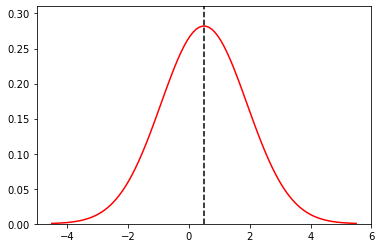

In [3]:
# plot pdf
plt.figure()
ylim_max = np.max(pdf)*1.1
plt.ylim(0,ylim_max)
plt.plot(X,pdf,"r-")
plt.plot([mean,mean],[0,ylim_max],'k--')

### Two Dimensions

In [4]:
def normalpdf_2d(X,mean,Sigma):
    nsample = X.shape[1]
    Z = np.zeros((1,nsample))
    for i in range(nsample):
        Z[0,i] = np.exp(-0.5*np.matmul((X[:,[i]]-mean).T,np.matmul(np.linalg.inv(Sigma),X[:,[i]]-mean)))/(2*np.pi)/np.sqrt(np.linalg.det(Sigma))
    return Z

In [5]:
npoint = 100
Cov = np.array([[1,-0.5],[-0.5,2]])
mean = np.array([[0.5],[0.5]])
xmax = mean[0,0]+5
xmin = mean[0,0]-5
ymax = mean[1,0]+5
ymin = mean[1,0]-5
Xval,Yval = np.meshgrid(np.linspace(xmin,xmax,npoint),np.linspace(xmin,xmax,npoint))
X = np.concatenate((np.reshape(Xval,(1,npoint*npoint)),np.reshape(Yval,(1,npoint*npoint))),axis=0)
Z = normalpdf_2d(X,mean,Cov)
Zval = np.reshape(Z,(npoint,npoint))

Text(0.5, 0, 'Z')

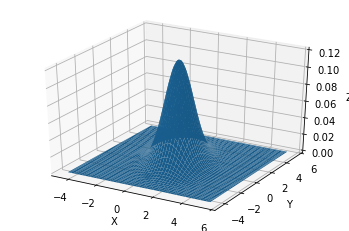

In [6]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_surface(Xval,Yval,Zval)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

Sigma: [2.20710678 0.79289322]


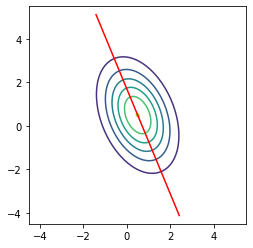

In [7]:
fig,ax = plt.subplots()
ax.set_aspect("equal")
plt.contour(Xval,Yval,Zval)
s = np.linspace(-5,5,100)
U,Sigma,Vt = np.linalg.svd(Cov)
print("Sigma: {}".format(Sigma))
line = U[:,[0]]*s+mean
plt.plot(line[0,:],line[1,:],'r-')

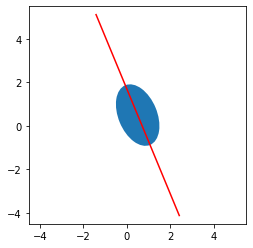

In [10]:
fig,ax  = plt.subplots()
ax.set_aspect("equal")
Sigma0 = np.sqrt(Sigma[0])
Sigma1 = np.sqrt(Sigma[1])
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
angle = np.arctan(U[1][0]/(U[0,0]+1e-10))*180/np.pi
ellipse = matplotlib.patches.Ellipse(xy=np.squeeze(mean),width=2*Sigma0,height=2*Sigma1,angle=angle)
ax.add_patch(ellipse)
plt.plot(line[0,:],line[1,:],'r-')